# Data Wrangling to visualize the Trends of sales and other data of 45 Ice Cream Stores for 2010-2012

In [1]:
import pandas as pd           # adding pandas library as variable pd
import matplotlib.pyplot as plt                      # adding pyplot from matplotlib as variable plt
import numpy as np                  # import of numpy library
import sklearn.linear_model as linear                  # import of linear model from sklearn library
from sklearn import metrics as mt                       # import of metrics from sklearn

In [2]:
region=pd.read_csv('Region.csv')            # read the csv file with data for Regions using pandas
store_details=pd.read_csv('StoreDetails.csv')            # read the csv file with data for Stores using pandas
weekly_sales=pd.read_csv('Weekly_Sales.csv')            # read the csv file with data for Sales using pandas
data=pd.merge(region,store_details)            # merge the data of regions and stores using pandas. This is an innerjoin
data=pd.merge(data,weekly_sales)            # merge the data of earlier merged data and sales using pandas.

In [3]:
data['Date']=pd.to_datetime(data['Date'])             # conversion of Date column to datetime format from string
data['year']=data['Date'].dt.year                    # extraction of year from the date column

In [4]:
store_1_2010=data[((data['Date']>'2010-01-01')&(data['Date']<'2011-01-01'))&(data['Store']==1)]   #Sales data of Store 1 in year 2010
store_1_2011=data[((data['Date']>'2011-01-01')&(data['Date']<'2012-01-01'))&(data['Store']==1)]   #Sales data of Store 1 in year 2011
store_1_2012=data[((data['Date']>'2012-01-01')&(data['Date']<'2013-01-01'))&(data['Store']==1)]   #Sales data of Store 1 in year 2012
store_1=data[data['Store']==1]                                 # store 1
store_wise=data.groupby('Store')['Weekly_Sales'].sum()     #overall sale record for stores
store_wise_2010=data[(data['Date']>'2010-01-01')&(data['Date']<'2011-01-01')].groupby('Store')['Weekly_Sales'].sum()
store_wise_2011=data[(data['Date']>'2011-01-01')&(data['Date']<'2012-01-01')].groupby('Store')['Weekly_Sales'].sum()
store_wise_2012=data[(data['Date']>'2012-01-01')&(data['Date']<'2013-01-01')].groupby('Store')['Weekly_Sales'].sum()
yearly_sale=data.groupby('year')['Weekly_Sales'].sum()    # Yearly grouped sale data
region_sale=data.groupby('Region')['Weekly_Sales'].sum()           # sale data grouped on the basis of region
temperature_detail=data.groupby('Store')['Temperature'].max()       # Maximumm temperature grouped by Store
temp_in_2010=data[data['year']==2010].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2010
temp_in_2011=data[data['year']==2011].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2011
temp_in_2012=data[data['year']==2012].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2012

### Store wise sales for three years

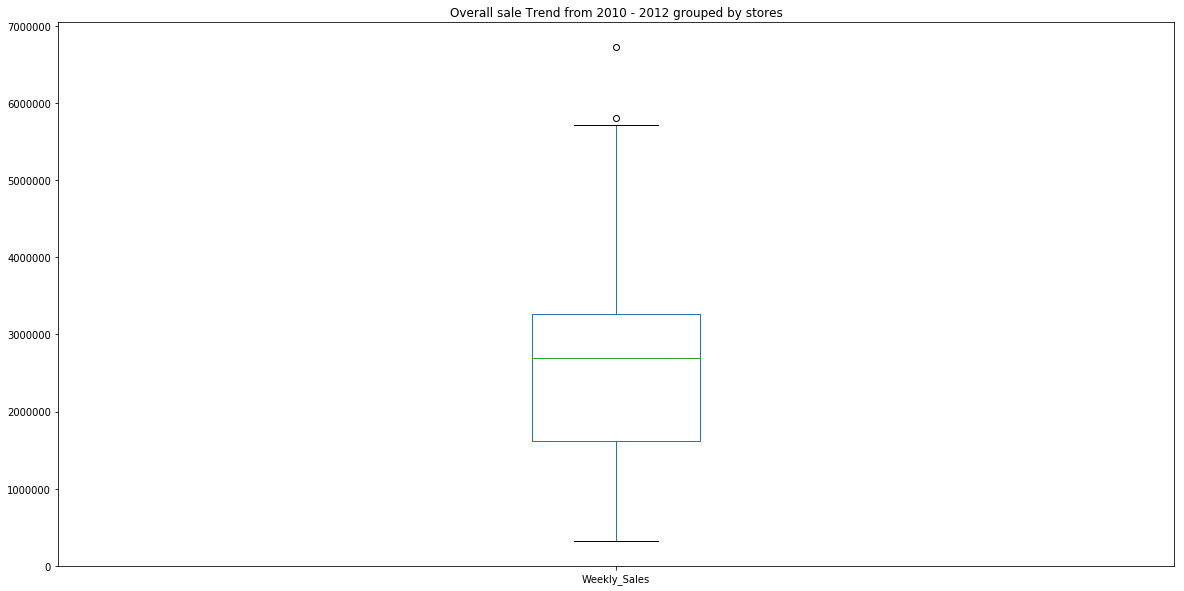

In [5]:
plt.figure(figsize=(20,10))
store_wise.plot.box()          # graph for store wise
plt.title('Overall sale Trend from 2010 - 2012 grouped by stores')
plt.show()

### Store wise sales for year 2010

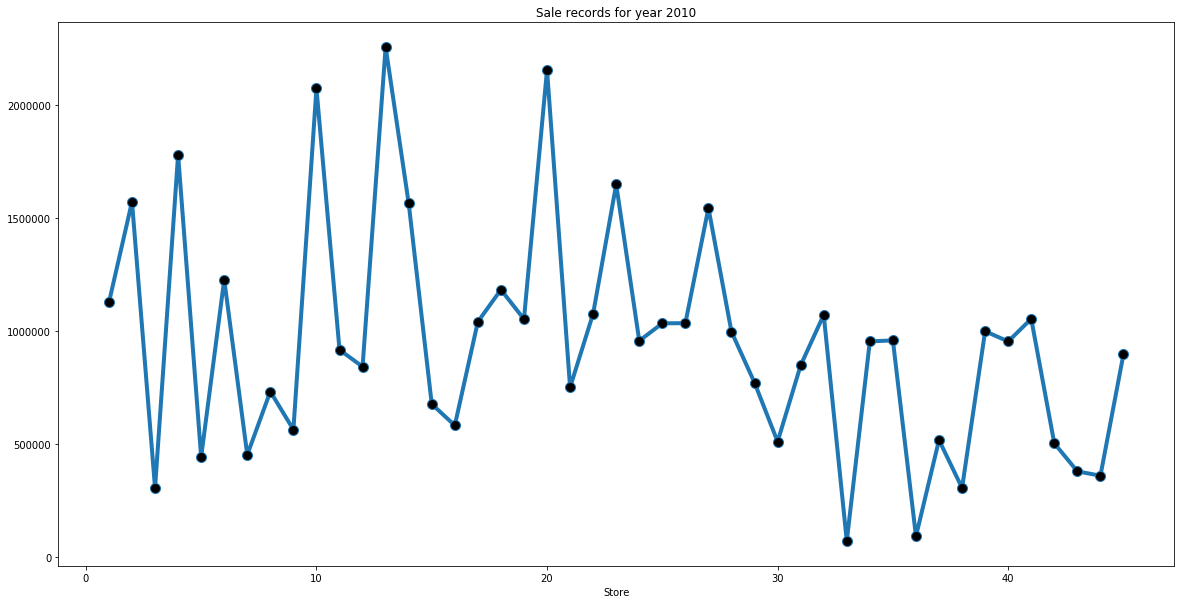

In [6]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)
plt.title('Sale records for year 2010')
plt.show()

### Store wise sales for year 2011

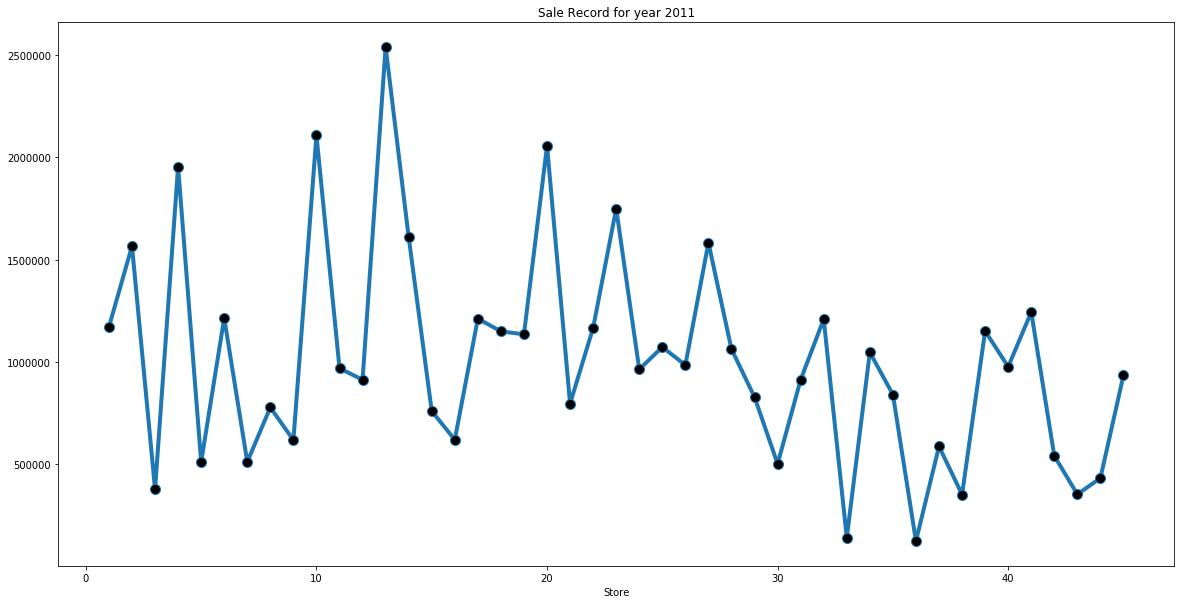

In [7]:
plt.figure(figsize=(20,10))
store_wise_2011.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)
plt.title('Sale Record for year 2011')
plt.show()

### Comparison of Store wise sales for three years

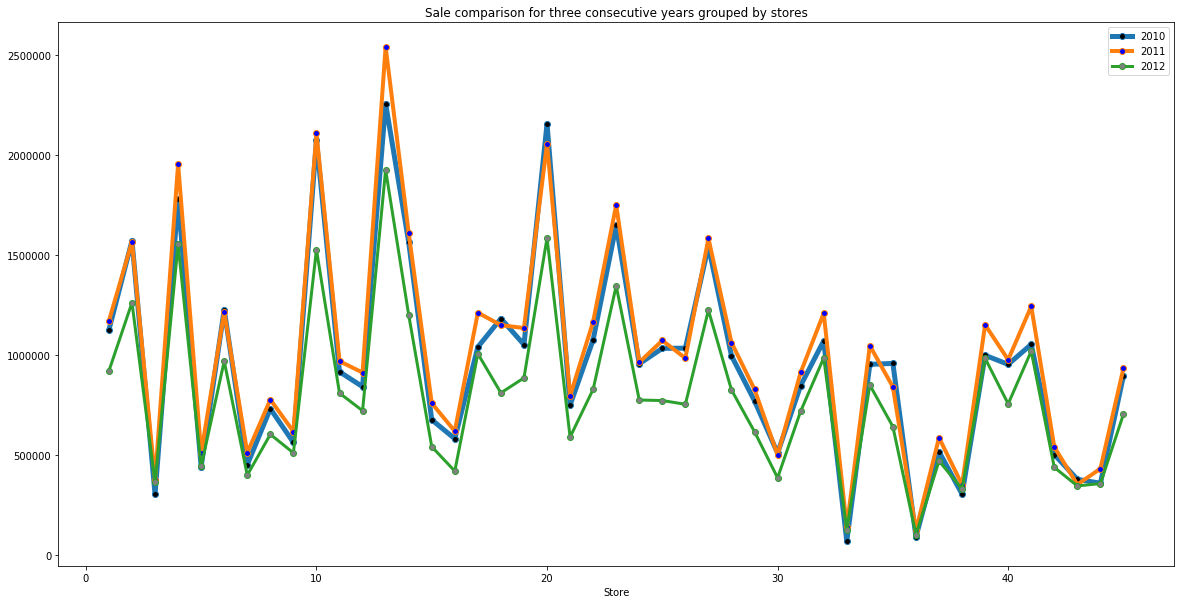

In [17]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(label='2010',style='-', marker='o', markerfacecolor='black',linewidth=5)
store_wise_2011.plot(label='2011',style='-', marker='o', markerfacecolor='blue',linewidth=4)
store_wise_2012.plot(label='2012',style='-', marker='o', markerfacecolor='grey',linewidth=3)
plt.legend()
plt.title('Sale comparison for three consecutive years grouped by stores')
plt.show()          # Comparison of three consecutive years for stores

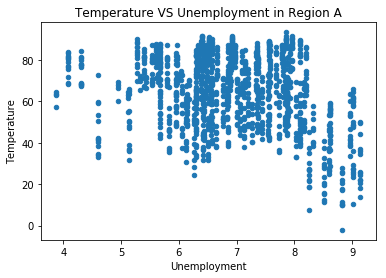

In [9]:
data[data['Region']=='A'].plot.scatter(x='Unemployment',y='Temperature')
plt.title('Temperature VS Unemployment in Region A')
plt.show()                                # scatter plot for Temperature vs Unemployment

### Comparison of Sales based on Unemployment in Region A

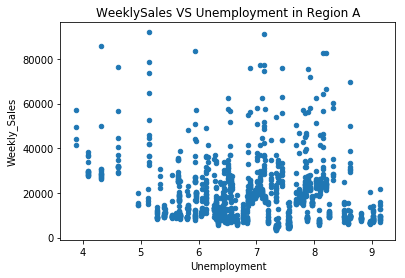

In [10]:
data[data['Region']=='A'].plot.scatter(x='Unemployment',y='Weekly_Sales')
plt.title('WeeklySales VS Unemployment in Region A')
plt.show()                        # scatter plot for Weekly Sales vs Unemployment

### Comparison of Sales based on Temperature in Region A

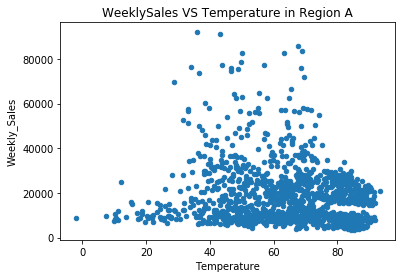

In [11]:
data[data['Region']=='A'].plot.scatter(x='Temperature',y='Weekly_Sales')
plt.title('WeeklySales VS Temperature in Region A')
plt.show()            # scatter plot for Temperature vs Weekly Sales

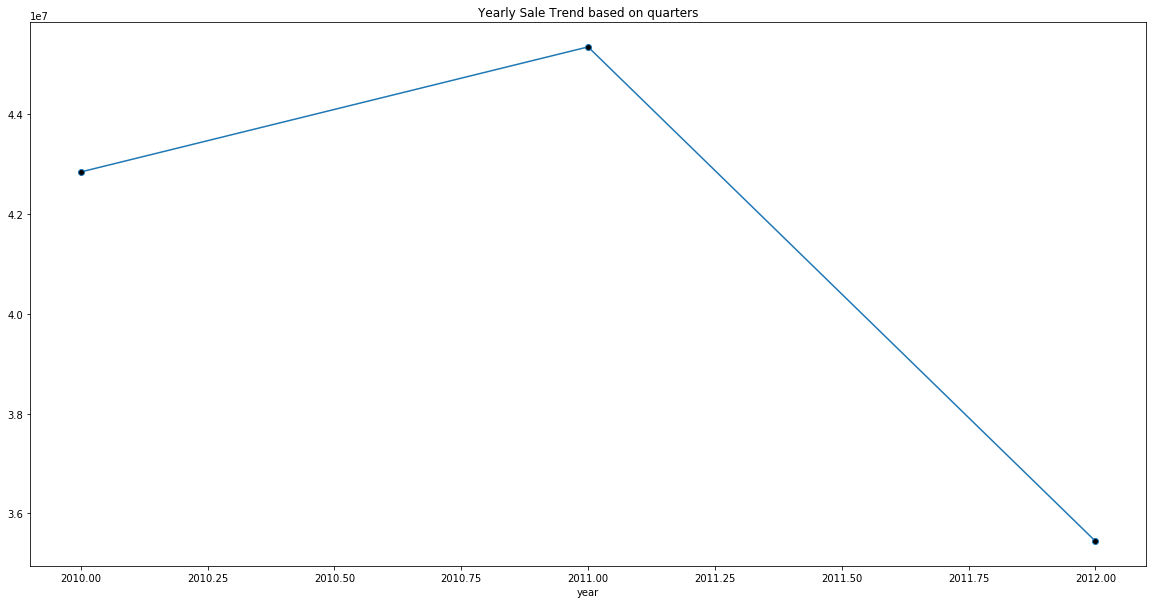

In [12]:
plt.figure(figsize=(20,10))
yearly_sale.plot(style='-', marker='o', markerfacecolor='black')
plt.title('Yearly Sale Trend based on quarters')
plt.show()          # Line graph for Yearly Sale Trend

### Yearly Report of Sales

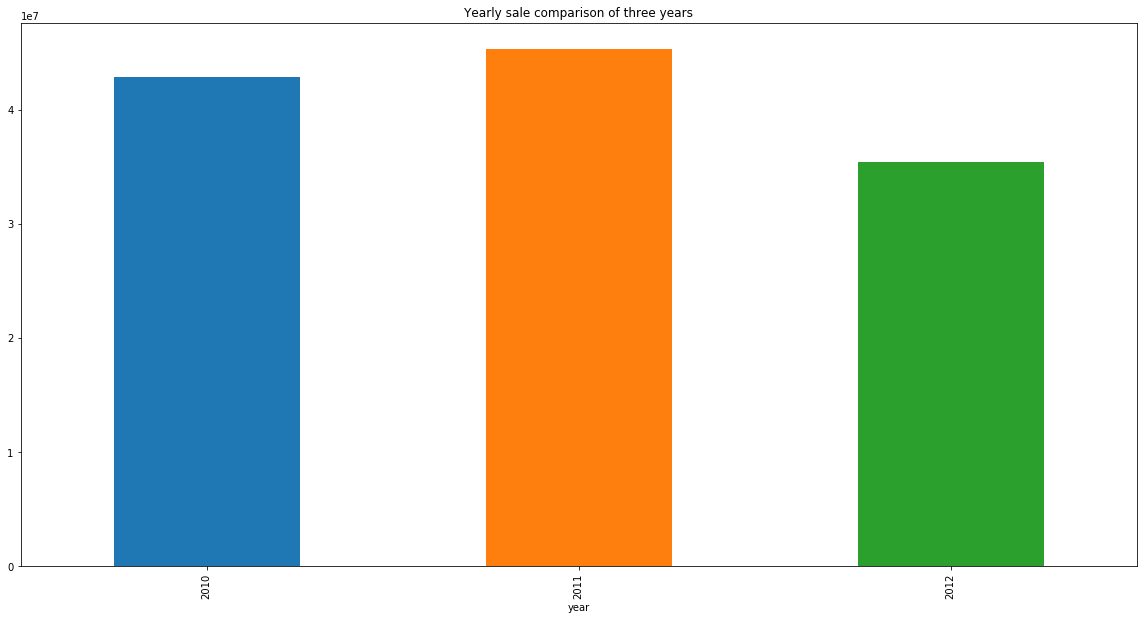

In [13]:
plt.figure(figsize=(20,10))
yearly_sale.plot.bar()
plt.title('Yearly sale comparison of three years')
plt.show()                               # Yearly Sale Bar Graph

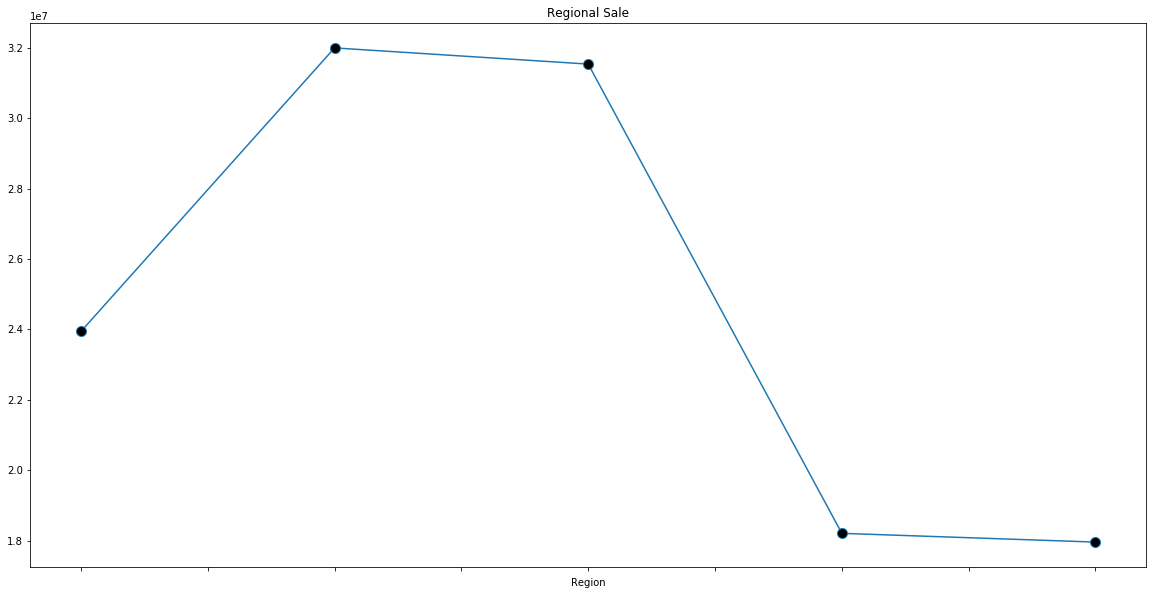

In [14]:
plt.figure(figsize=(20,10))
region_sale.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Regional Sale')
plt.show()                # Region based Sales Graph

### Temperature data for all stores

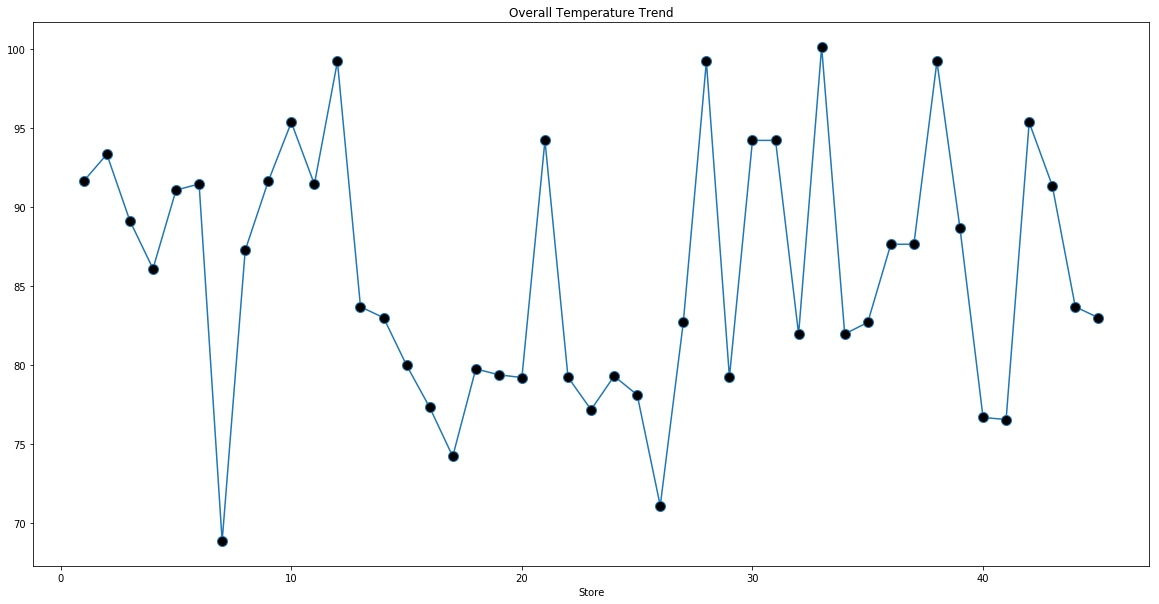

In [15]:
plt.figure(figsize=(20,10))
temperature_detail.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Overall Temperature Trend')
plt.show()        # Temperature Trend among Stores

### Comparison of Temperature data for all stores in three years

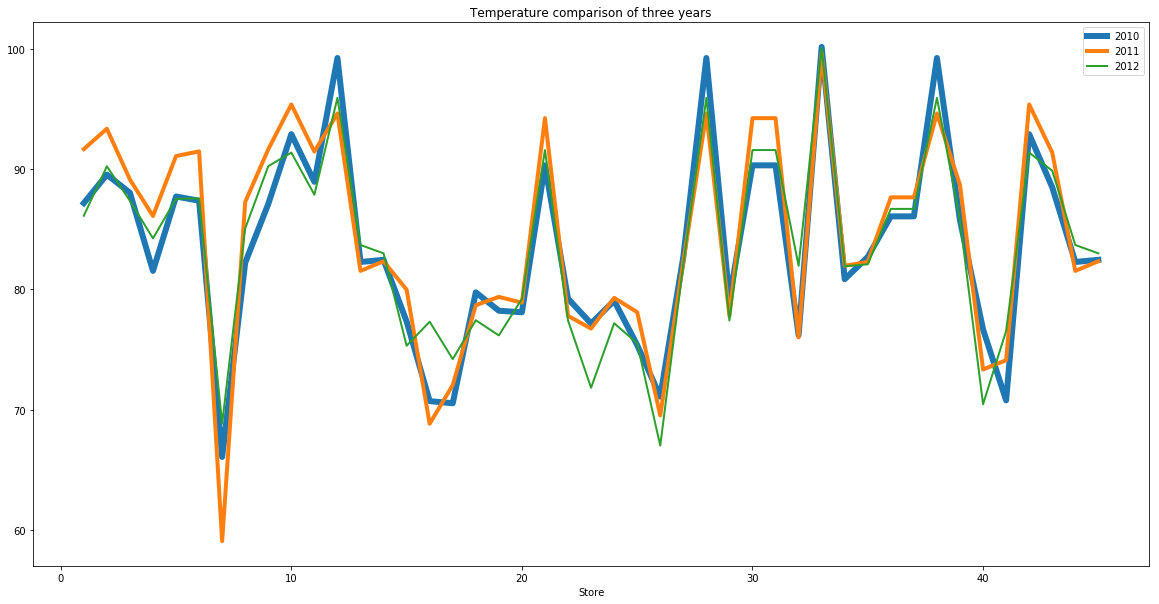

In [18]:
plt.figure(figsize=(20,10))
temp_in_2010.plot(label='2010', linewidth=6)
temp_in_2011.plot(label='2011', linewidth=4)
temp_in_2012.plot(label='2012', linewidth=2)
plt.legend()
plt.title('Temperature comparison of three years')
plt.show()                                # Temperature Trend Among All the stores

### Sales in three years

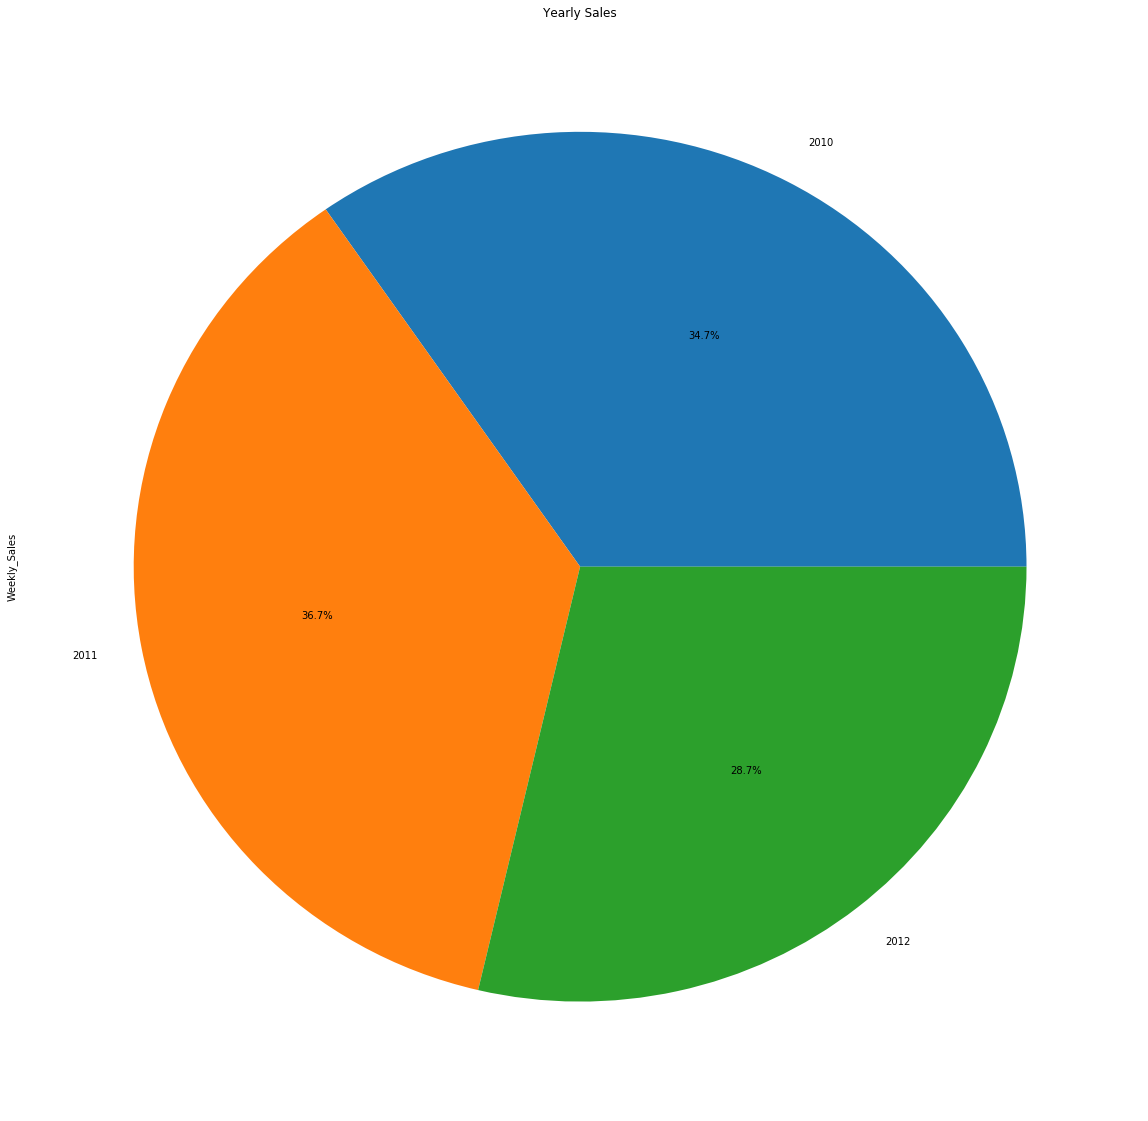

In [19]:
plt.figure(figsize=(20,20))
yearly_sale.plot.pie(autopct='%1.1f%%')
plt.title('Yearly Sales')
plt.show()                 # Yearly Sales division

### Region wise Sales in three years

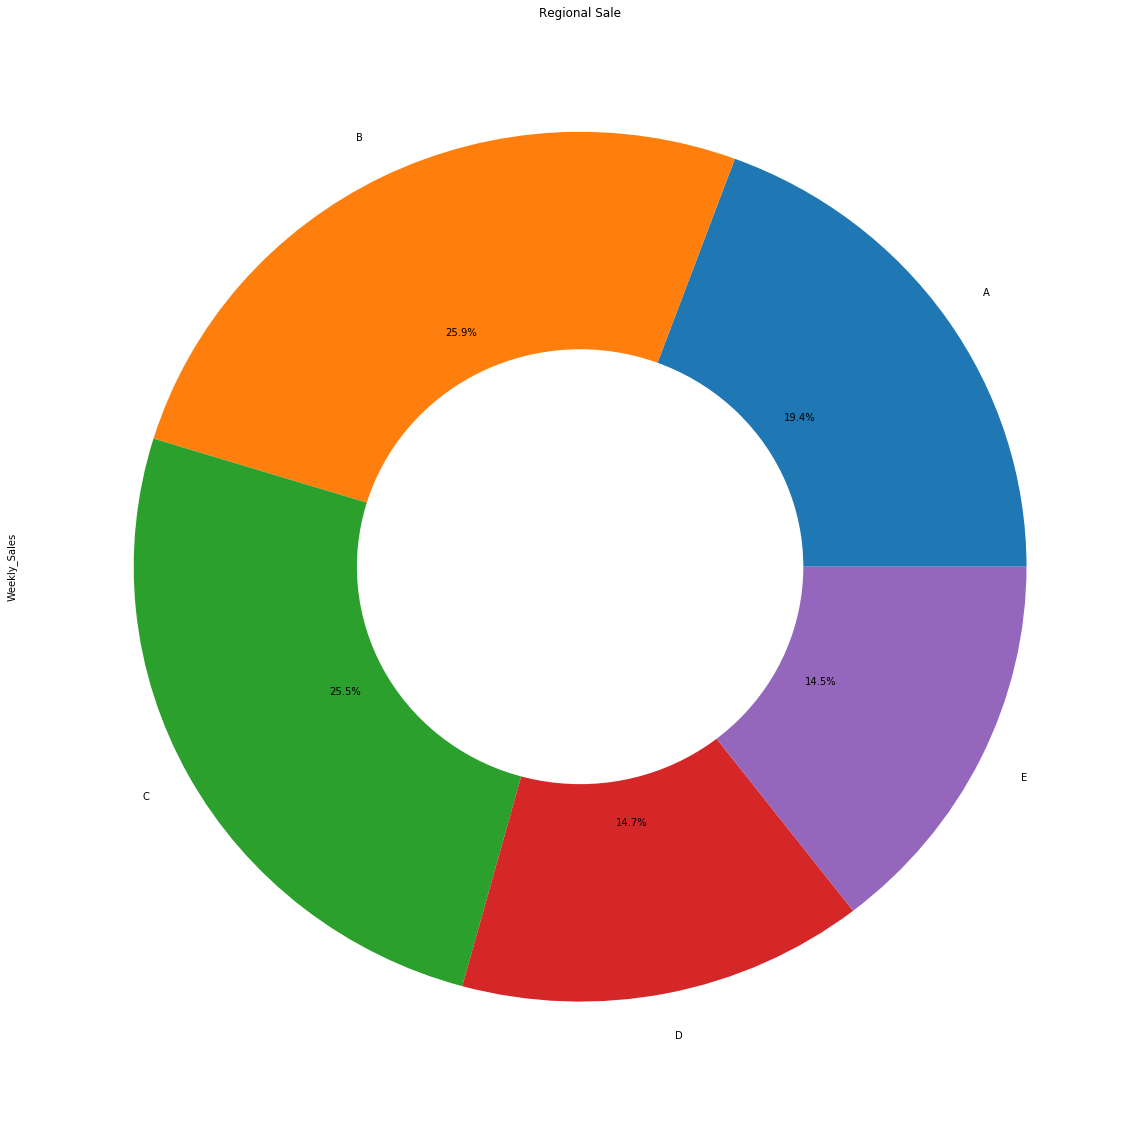

In [20]:
plt.figure(figsize=(20,20))
region_sale.plot.pie(autopct='%1.1f%%')
plt.title('Regional Sale')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()          # Regional Sale division

### Sale trend of Store 1 in year 2010

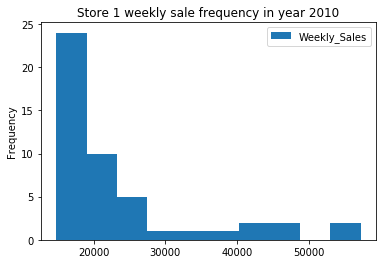

In [21]:
store_1_2010.plot.hist(y='Weekly_Sales', x='Date')
plt.title('Store 1 weekly sale frequency in year 2010')
plt.show()          # Weekly Sales for Store 1 in year 2010

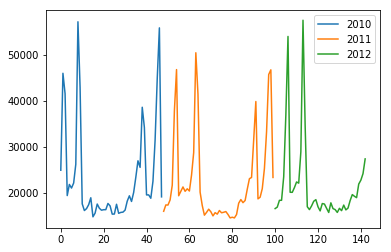

In [22]:
plt.plot(store_1_2010.index,store_1_2010['Weekly_Sales'],label='2010')
plt.plot(store_1_2011.index,store_1_2011['Weekly_Sales'],label='2011')
plt.plot(store_1_2012.index,store_1_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.show()


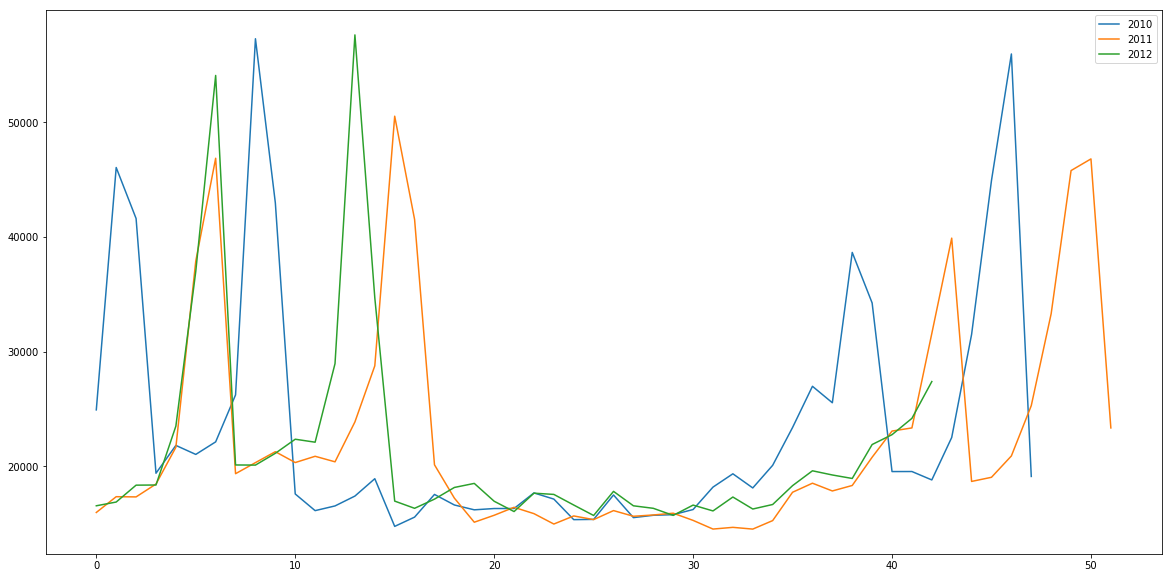

In [23]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.show()


In [24]:
linear=linear.LinearRegression()
train=pd.DataFrame();                          # declaration of empty dataset to be used for training of model
train['Temperature']=store_1['Temperature'][:100]
train['Unemployment']=store_1['Unemployment'][:100]
test=pd.DataFrame();
test['Temperature']=store_1['Temperature'][100:]
test['Unemployment']=store_1['Unemployment'][100:]
linear.fit(train,store_1['Weekly_Sales'][:100])
linear.score(train,store_1['Weekly_Sales'][:100])
train['Weekly_Sales']=store_1['Weekly_Sales'][:100]
test['test_result']=linear.predict(test)

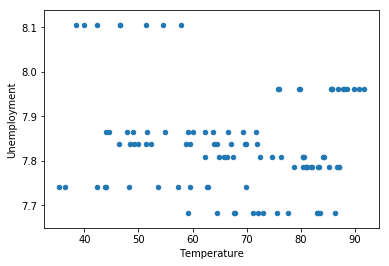

In [25]:
train.plot.scatter('Temperature','Unemployment')
plt.show()

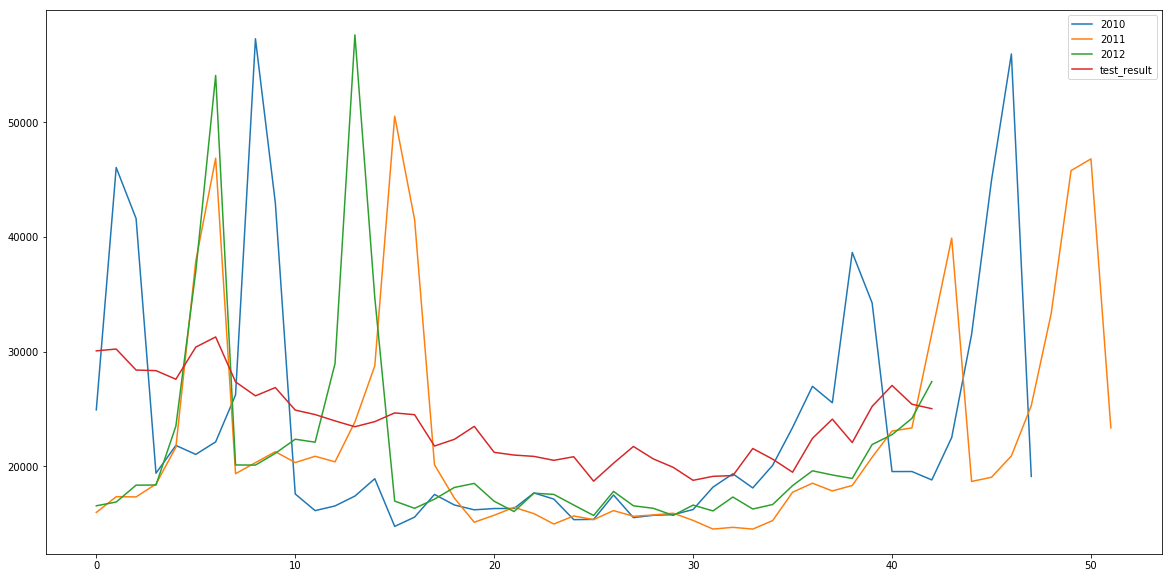

In [27]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.plot(range(43),test['test_result'])
plt.legend()
plt.show()


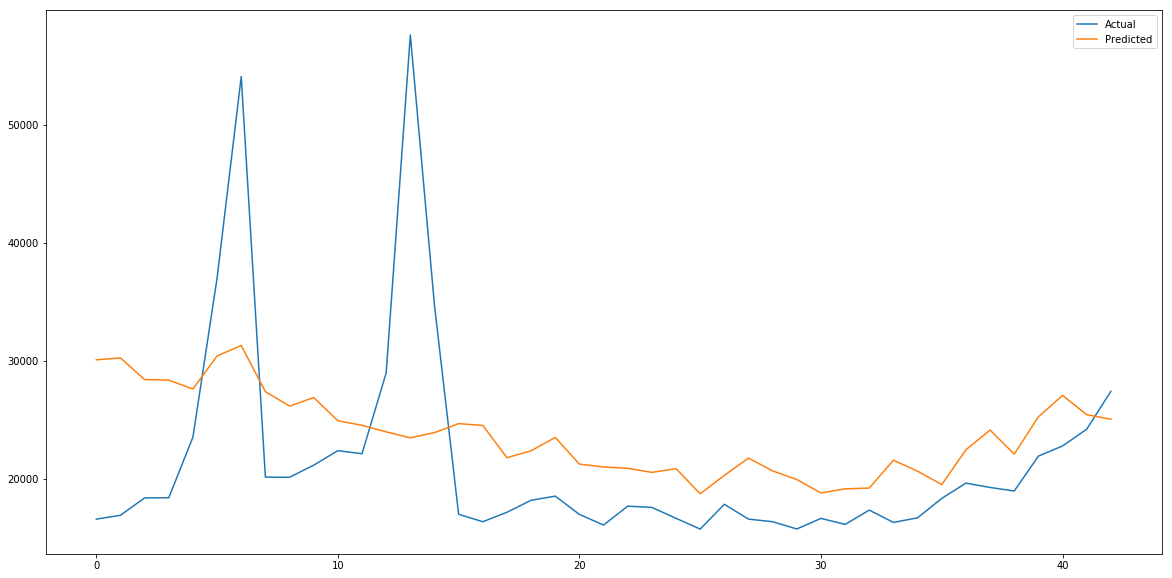

In [28]:
plt.figure(figsize=(20,10))
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='Actual')
plt.plot(range(43),test['test_result'],label='Predicted')
plt.legend()
plt.show()